# Analysis around Simpson's Paradox

## Context

In 1972-1974, in Whickham, a town in the north-east of England, located approximately 6.5 kilometres south-west of Newcastle upon Tyne, a survey of one-sixth of the electorate was conducted in order to inform work on thyroid and heart disease (Tunbridge and al. 1977). A continuation of this study was carried out twenty years later. (Vanderpump et al. 1995). Some of the results were related to smoking and whether individuals were still alive at the time of the second study. For the purpose of simplicity, we will restrict the data to women and among these to the 1314 that were categorized as "smoking currently" or "never smoked". There were relatively few women in the initial survey who smoked but have since quit (162) and very few for which information was not available (18). Survival at 20 years was determined for all women of the first survey.

## The dataset

First, let's study how the dataset looks like:

In [3]:
df <- read.csv("Subject6_smoking.csv")
df

Smoker,Status,Age
<chr>,<chr>,<dbl>
Yes,Alive,21.0
Yes,Alive,19.3
No,Dead,57.5
No,Alive,47.1
Yes,Alive,81.4
No,Alive,36.8
No,Alive,23.8
Yes,Dead,57.5
Yes,Alive,24.8


As we can see, the dataset is composed of 1314 rows with three columns: Smoker (bool), Status (bool) and Age (Double). Besides, as we can see below, it seems that there's no missing data, and the age of the participants is well distributed, going from 18 years old to 89, with a mean of 47 years old. 

In [4]:
summary(df)

    Smoker             Status               Age       
 Length:1314        Length:1314        Min.   :18.00  
 Class :character   Class :character   1st Qu.:31.30  
 Mode  :character   Mode  :character   Median :44.80  
                                       Mean   :47.36  
                                       3rd Qu.:60.60  
                                       Max.   :89.90  

Let's use the libraries **dplyr** and **ggplot2** to get a general view from this data. 

## Task 1:

Tabulate the total number of women alive and dead over the period according to their smoking habits. Calculate in each group (smoking/non-smoking) the mortality rate (the ratio of the number of women who died in a group to the total number of women in that group). You can graph these data and calculate confidence intervals if you wish. Why is this result surprising?

In [5]:
library(dplyr)
library(ggplot2)

# Calculates mortality ratios for smoking and non smoking women.

mortality_smoking = df %>% 
    filter(Smoker == "Yes") %>%
    summarise(ratio = 100 * mean(Status == "Dead"))

mortality_not_smoking = df %>%
    filter(Smoker == "No") %>%
    summarise(ratio = 100 * mean(Status == "Dead"))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




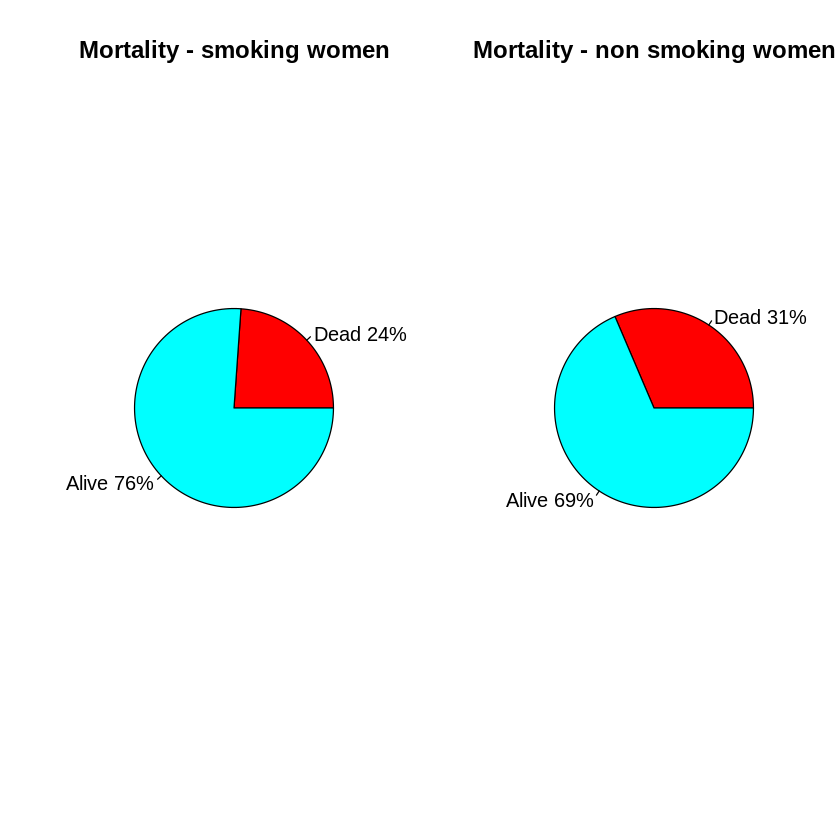

In [110]:
# Builds pie charts to represent mortality among smoking and non smoking women.

smoking_data <- c(mortality_smoking[,1], 100-mortality_smoking[,1])
labels <- c("Dead", "Alive")
smoking_percentages <- round(smoking_data/sum(smoking_data)*100)
smoking_labels <- paste(labels, smoking_percentages)
smoking_labels <- paste(smoking_labels, "%", sep="")

not_smoking_data = c(mortality_not_smoking[,1], 100-mortality_not_smoking[,1])
not_smoking_percentages <-round(not_smoking_data/sum(not_smoking_data)*100)
not_smoking_labels <- paste(labels, not_smoking_percentages)
not_smoking_labels <- paste(not_smoking_labels, "%", sep="")

par(mfrow=c(1,2)) 

pie(smoking_data, labels = smoking_labels, col=rainbow(length(smoking_labels)), main="Mortality - smoking women")
pie(not_smoking_data, labels = not_smoking_labels, col=rainbow(length(labels)), main="Mortality - non smoking women")

As we can see, the mortality among smoking women is actually lower than among non smoking women! If we stopped the analysis here, we could think that smoking is actually good for their health, and therefore the women that smoked lived more. However, let's analyse the data in depth to better understand our results.

We will now analyse the confidence interval of the data.

In [37]:
# First, calculating the standard deviation of the smokers.

smokers <- df[df$Smoker == "Yes",]$Status
smokers = gsub('Alive', 1, smokers)
smokers = gsub('Dead', 0, smokers)

sd(smokers)

# Then, calculating the standard deviation of the non smokers

non_smokers <- df[df$Smoker == "No",]$Status 
non_smokers = gsub('Alive', 1, non_smokers)
non_smokers = gsub('Dead', 0, non_smokers)

sd(non_smokers)

[1] 0.4267364

[1] 0.4645169

In [43]:
# Now, let's calculate the confidence interval for smokers and non smokers

smokers_conf_interval <- 2 * (sd(smokers)  / sqrt(length(smokers)))
non_smokers_conf_interval <- 2 * (sd(non_smokers) / sqrt(length(non_smokers)))

c(mortality_smoking[,1] - smokers_conf_interval, mortality_smoking[,1] + smokers_conf_interval)
c(mortality_not_smoking[,1] - non_smokers_conf_interval, mortality_not_smoking[,1] + non_smokers_conf_interval)

[1] 23.84778 23.91854

[1] 31.38643 31.45510

### Conclusion:

As we can see, we can confirm with more than 90% confidence level that the smokers death ratio is lower than the non smokers one. 

For smokers, the death ratio with the confidence interval varies from 23.84 to 23.91, while for non smokers it varies from 31.38 to 31.45.

Those values are surprising, since we would usually expect the smokers to have a shorter lifetime. This difference might be explained if we analyse the age groups of the alive and dead women!

## Task 2:

Go back to question 1 (numbers and mortality rates) and add a new category related to the age group. For example, the following classes will be considered: 18-34 years, 34-54 years, 55-64 years, over 65 years.

Why is this result surprising? Can you explain this paradox? Similarly, you may wish to provide a graphical representation of the data to support your explanations.


In [112]:
# First, let's build the new dataframe with a category related to the age group.

df_by_age = df %>% mutate(Age_group = case_when(
    df$Age >= 18.0 & df$Age < 34.0 ~ "18-34",
    df$Age >= 34.0 & df$Age < 54.0 ~ "34-54",
    df$Age >= 54.0 & df$Age < 65.0 ~ "54-65",
    df$Age >= 65.0 ~ "65+",
)) 

df_by_age


Smoker,Status,Age,Age_group
<chr>,<chr>,<dbl>,<chr>
Yes,Alive,21.0,18-34
Yes,Alive,19.3,18-34
No,Dead,57.5,54-65
No,Alive,47.1,34-54
Yes,Alive,81.4,65+
No,Alive,36.8,34-54
No,Alive,23.8,18-34
Yes,Dead,57.5,54-65
Yes,Alive,24.8,18-34


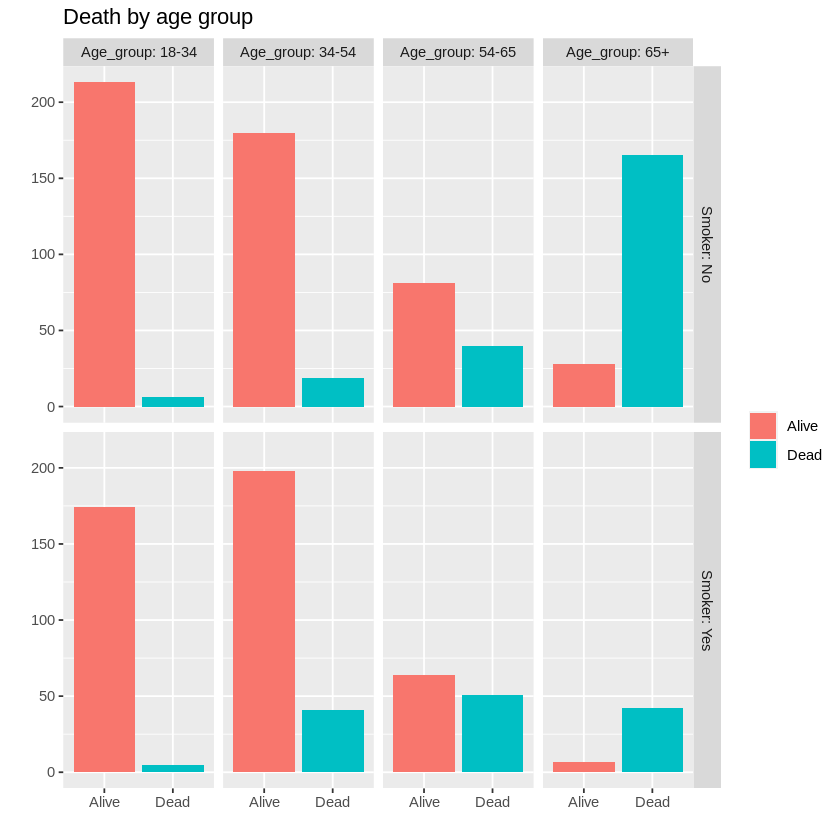

In [100]:
# Plotting 
ggplot(df_by_age) +
  facet_grid(Smoker ~ Age_group, labeller = label_both) +
  aes(x = Status, fill = Status) + 
  geom_bar() +
  labs(x = "", y = "", fill = "", title = "Death by age group")


Based on the graphs, we can see that the proportion of dead women increases with the age group. The older they get, the higher are the chances of dying, especially for the smokers population. Let's check the numbers just to be sure.

In [109]:
df_by_age %>%
    group_by(Smoker, Age_group) %>%
    summarise(Alive = sum(Status == "Alive"), Dead = sum(Status == "Dead"), Death_mean = mean(Status == "Dead"))

`summarise()` has grouped output by 'Smoker'. You can override using the `.groups` argument.



Smoker,Age_group,Alive,Dead,Death_mean
<chr>,<chr>,<int>,<int>,<dbl>
No,18-34,213,6,0.02739726
No,34-54,180,19,0.09547739
No,54-65,81,40,0.33057851
No,65+,28,165,0.85492228
Yes,18-34,174,5,0.02793296
Yes,34-54,198,41,0.17154812
Yes,54-65,64,51,0.44347826
Yes,65+,7,42,0.85714286


### Conclusions

Based on the table above, we notice that the biggest death gap happens in the 34-54 age group. For non smokers, 33% of this population was dead, and this number rises to 44% among smokers.

Besides, it's important to remark that all age groups have a bigger death ratio for smokers, but, as we have seen before, the total average death is higher for non smokers. 

Let's do a logistic regression to understand that.

## Task 3:

In order to avoid a bias induced by arbitrary and non-regular age groupings, it is possible to try to perform a logistic regression. If we introduce a Death variable of 1 or 0 to indicate whether the individual died during the 20-year period, we can study the Death ~ Age model to study the probability of death as a function of age according to whether one considers the group of smokers or non-smokers. Do these regressions allow you to conclude or not on the harmfulness of smoking? You will be able to propose a graphical representation of these regressions (without omitting the regions of confidence).

In [216]:
# First, let's introduce a variable of 1 or 0 to indicate whether the individual died during the 20-year period.

# If the person is dead, we consider it as "1". If it is alive, we will consider as "0". 
df_Death = df %>% mutate(Death = case_when(
    df$Status == "Alive" ~ 0,
    df$Status == "Dead" ~ 1
))

In [217]:
regression = glm(Death ~ Age + Smoker, data = df_Death, family = binomial)

regression


Call:  glm(formula = Death ~ Age + Smoker, family = binomial, data = df_Death)

Coefficients:
(Intercept)          Age    SmokerYes  
   -6.35187      0.09984      0.27865  

Degrees of Freedom: 1313 Total (i.e. Null);  1311 Residual
Null Deviance:	    1560 
Residual Deviance: 1002 	AIC: 1008

----------
Now that we created the regression model, let's plot it to have a clear visualisation. 

`geom_smooth()` using formula 'y ~ x'



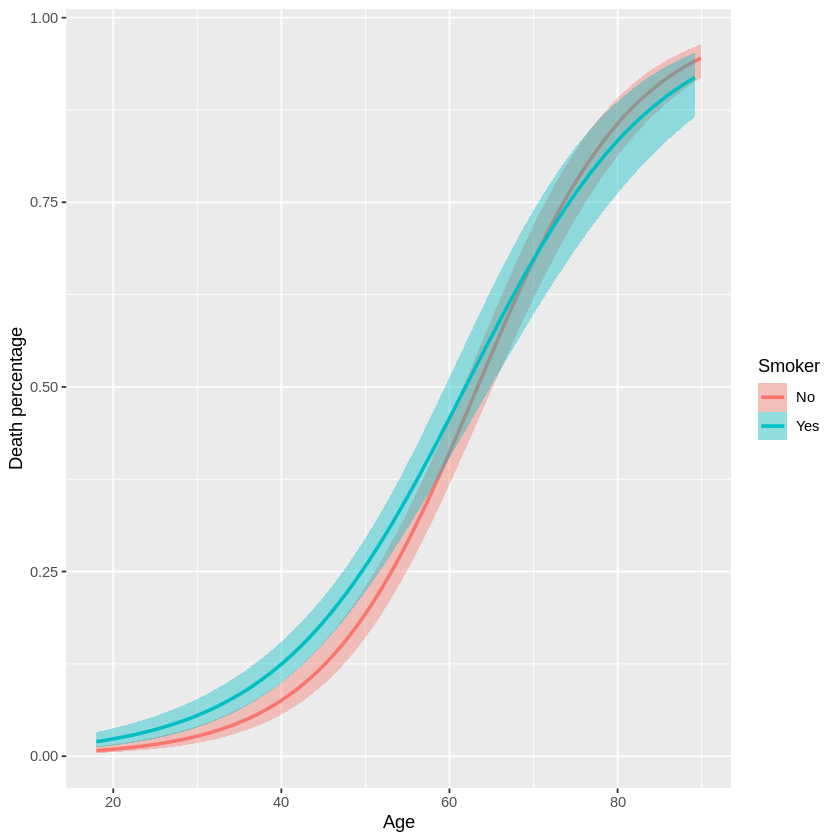

In [227]:
ggplot(df_Death) +
    aes(x = Age, y = Death, group = Smoker) +
    geom_smooth(method = "glm", level = .90, method.args = list(family=binomial), aes(color=Smoker, fill=Smoker)) +
    ylab("Death percentage")

Finally, the graph shows that the chances of dying are actually smaller for smokers as they age. Quite unexpected, no? 

In the beginning, the smokers have a higher mortality rate up to around their 70's, and then non smokers take the lead.

## Conclusion

Finally, based on the three analysis we made, we can't conclude that smokers have a higher mortality ratio. Normally, we would expect the smokers to have a higher mortality ratio, but the dataset we have doesn't allow us to conclude that.

The good news is that we learned that we have to be careful when using arbirtary and non regular groupings, since they can disfigure our data. We also learned how to perform logistic regressions, and how to visualize it in R. 